In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
from pickle import load
with open("dataset.obj","rb") as f:
    dataset = load(f)

In [3]:
dataset

[(array([[False,  True, False],
         [ True, False,  True],
         [ True,  True, False]]),
  0),
 (array([[ True, False, False],
         [ True,  True,  True],
         [False,  True, False]]),
  1),
 (array([[ True, False,  True],
         [False,  True, False],
         [False,  True,  True]]),
  1),
 (array([[ True,  True,  True],
         [False, False,  True],
         [False,  True, False]]),
  1),
 (array([[ True, False,  True],
         [False, False, False],
         [ True,  True, False]]),
  0),
 (array([[ True, False, False],
         [False,  True,  True],
         [False, False,  True]]),
  1),
 (array([[False,  True, False],
         [ True,  True, False],
         [ True, False, False]]),
  0),
 (array([[ True,  True,  True],
         [ True, False, False],
         [False,  True, False]]),
  1),
 (array([[False,  True,  True],
         [ True, False,  True],
         [False, False,  True]]),
  1),
 (array([[False,  True,  True],
         [ True, False, False],


In [4]:
inputs = torch.tensor([[data[0]] for data in dataset],dtype=torch.float32)
labels = torch.tensor([data[1] for data in dataset],dtype=torch.float32)
inputs,labels

C:\Users\kumar\AppData\Local\Temp\ipykernel_14936\3781885277.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  inputs = torch.tensor([[data[0]] for data in dataset],dtype=torch.float32)


(tensor([[[[0., 1., 0.],
           [1., 0., 1.],
           [1., 1., 0.]]],
 
 
         [[[1., 0., 0.],
           [1., 1., 1.],
           [0., 1., 0.]]],
 
 
         [[[1., 0., 1.],
           [0., 1., 0.],
           [0., 1., 1.]]],
 
 
         [[[1., 1., 1.],
           [0., 0., 1.],
           [0., 1., 0.]]],
 
 
         [[[1., 0., 1.],
           [0., 0., 0.],
           [1., 1., 0.]]],
 
 
         [[[1., 0., 0.],
           [0., 1., 1.],
           [0., 0., 1.]]],
 
 
         [[[0., 1., 0.],
           [1., 1., 0.],
           [1., 0., 0.]]],
 
 
         [[[1., 1., 1.],
           [1., 0., 0.],
           [0., 1., 0.]]],
 
 
         [[[0., 1., 1.],
           [1., 0., 1.],
           [0., 0., 1.]]],
 
 
         [[[0., 1., 1.],
           [1., 0., 0.],
           [1., 1., 0.]]],
 
 
         [[[0., 0., 0.],
           [1., 1., 0.],
           [1., 0., 1.]]],
 
 
         [[[0., 0., 0.],
           [0., 1., 1.],
           [1., 0., 1.]]],
 
 
         [[[1., 0., 0.],
   

In [5]:
from torch.utils.data import TensorDataset, random_split

trainDataset = TensorDataset(inputs,labels)

# testTrainSplitSize = 1
# trainSize = int(testTrainSplitSize * len(crossZeroDataset))
# testSize = len(crossZeroDataset) - trainSize 


In [6]:
import torch.nn as nn
import torch.optim as optim

class ClassicalCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3,padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, padding=1)
        self.pool2 = nn.MaxPool2d(2)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu(x)
        
        x = self.pool2(x)

        x = x.view(-1)
        x = torch.sigmoid(x)
        return x
    
model = ClassicalCNN()

In [7]:
t = np.random.randint(1,100,1)
print(t)
print(inputs[t])
model(inputs[t])

[19]
tensor([[[[1., 1., 0.],
          [0., 0., 1.],
          [0., 1., 0.]]]])


tensor([0.5000], grad_fn=<SigmoidBackward0>)

In [8]:
from torch.utils.data import DataLoader

criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

trainLoader = DataLoader(trainDataset, batch_size=4, shuffle=True)
# testLoader = DataLoader(testDataset, batch_size=4, shuffle=False)

In [9]:
for images,labels in trainLoader:
    print(images.shape,labels)
    print(model(images))
    break

torch.Size([4, 1, 3, 3]) tensor([0., 1., 0., 0.])
tensor([0.5192, 0.5216, 0.5114, 0.5192], grad_fn=<SigmoidBackward0>)


In [10]:
epochs = 3000
cost = []
accur = []
model.train(True)
for _e in range(epochs):
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in trainLoader:
        images = images
        labels = labels
        optimizer.zero_grad()
        outputs = model(images)
        loss = criteria(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = (outputs > 0.5).float()

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    if _e%10==0:
        cost.append(total_loss)
        accur.append(correct/total)
        print(f"Epoch: {_e+1} Correct:{correct} Total: {total} Loss: {total_loss}")

print(cost)

Epoch: 1 Correct:54 Total: 104 Loss: 72.03377532958984
Epoch: 11 Correct:52 Total: 104 Loss: 71.86135125160217
Epoch: 21 Correct:52 Total: 104 Loss: 71.73619389533997
Epoch: 31 Correct:52 Total: 104 Loss: 71.64477014541626
Epoch: 41 Correct:52 Total: 104 Loss: 71.38235104084015
Epoch: 51 Correct:52 Total: 104 Loss: 71.38070178031921
Epoch: 61 Correct:52 Total: 104 Loss: 70.96314227581024
Epoch: 71 Correct:54 Total: 104 Loss: 70.70896399021149
Epoch: 81 Correct:55 Total: 104 Loss: 70.7811210155487
Epoch: 91 Correct:56 Total: 104 Loss: 70.1924797296524
Epoch: 101 Correct:56 Total: 104 Loss: 69.77591264247894
Epoch: 111 Correct:58 Total: 104 Loss: 70.2818250656128
Epoch: 121 Correct:62 Total: 104 Loss: 69.82844853401184
Epoch: 131 Correct:61 Total: 104 Loss: 68.77887213230133
Epoch: 141 Correct:62 Total: 104 Loss: 68.33598363399506
Epoch: 151 Correct:62 Total: 104 Loss: 68.70659065246582
Epoch: 161 Correct:64 Total: 104 Loss: 68.91405355930328
Epoch: 171 Correct:64 Total: 104 Loss: 68.420

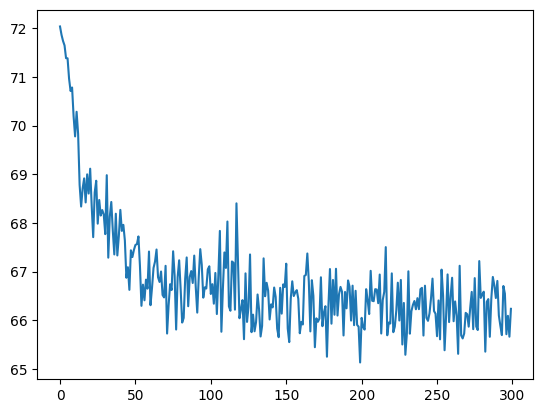

In [11]:
plt.plot(cost)

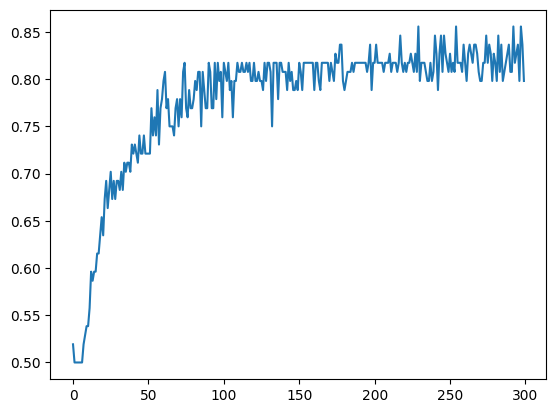

In [12]:
plt.plot(accur)